time series starts 2011-05-03


AdjClose
2932.19
2866.02
2872.40
2863.89
2872.46
2890.63
2883.42
2844.08
2871.03
2849.07


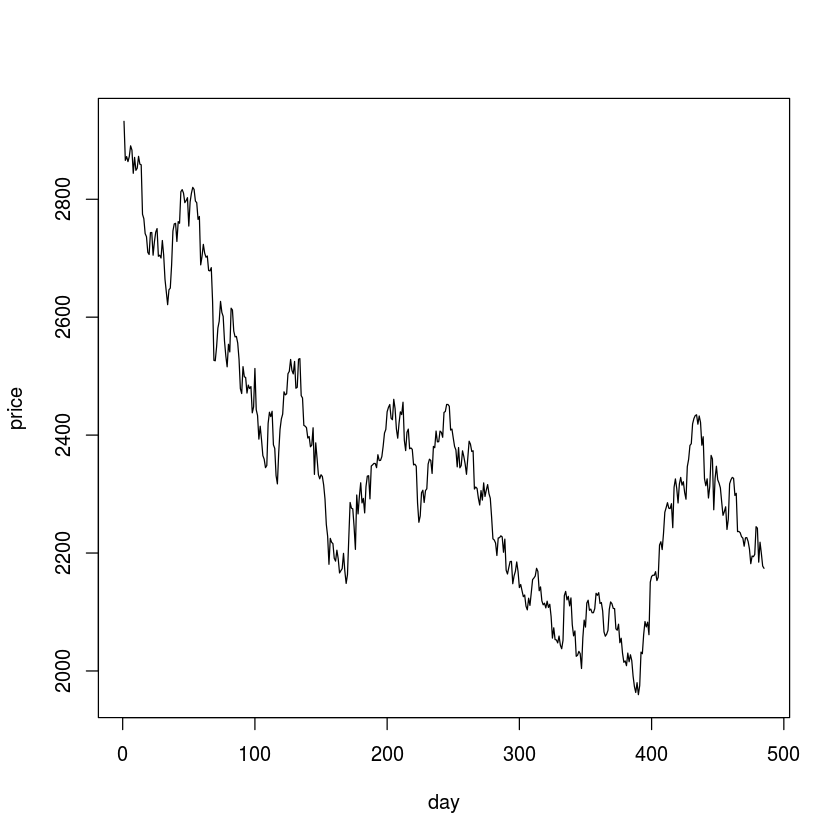

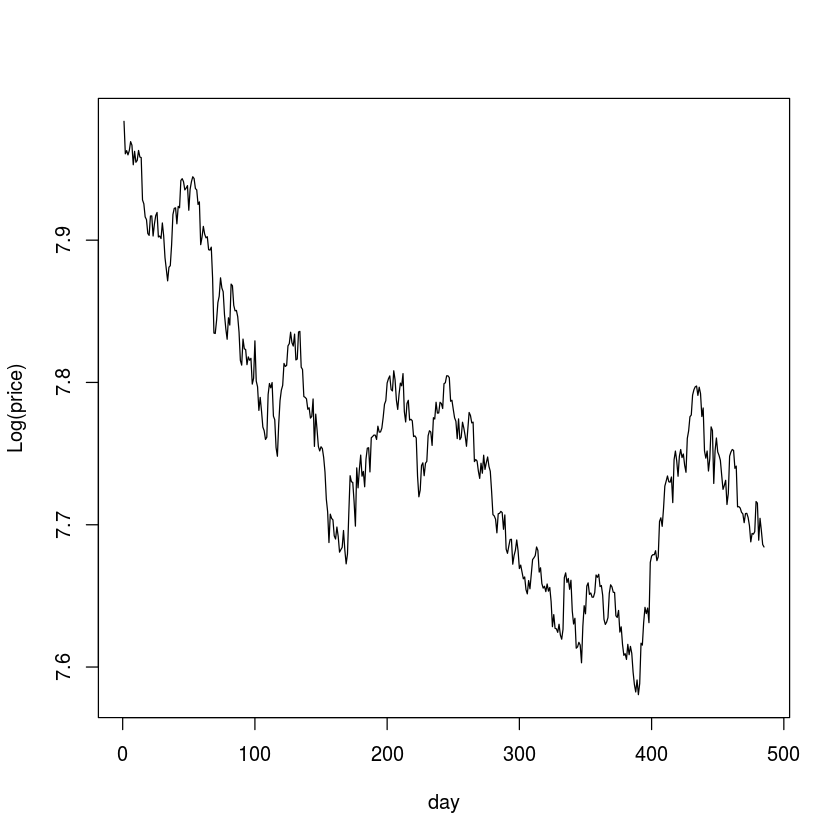

In [90]:
#install.packages('tseries')
library(tseries)
library(zoo)


szts = get.hist.quote(instrument = "000001.SS", "2011-05-01", "2013-05-02",quote = c("AdjClose"),
provider = c("yahoo"), method = NULL, compression = "d",
retclass = c("zoo"), quiet = FALSE, drop = FALSE)

#szts =ts(szts, frequency=7)

#coredata(szts)
szts = ts(coredata(szts), frequency = 1)

#array = szts["AdjClose"]
#array

plot(szts,ylab='price', xlab='day')
plot(log(szts), ylab="Log(price)", xlab="day")


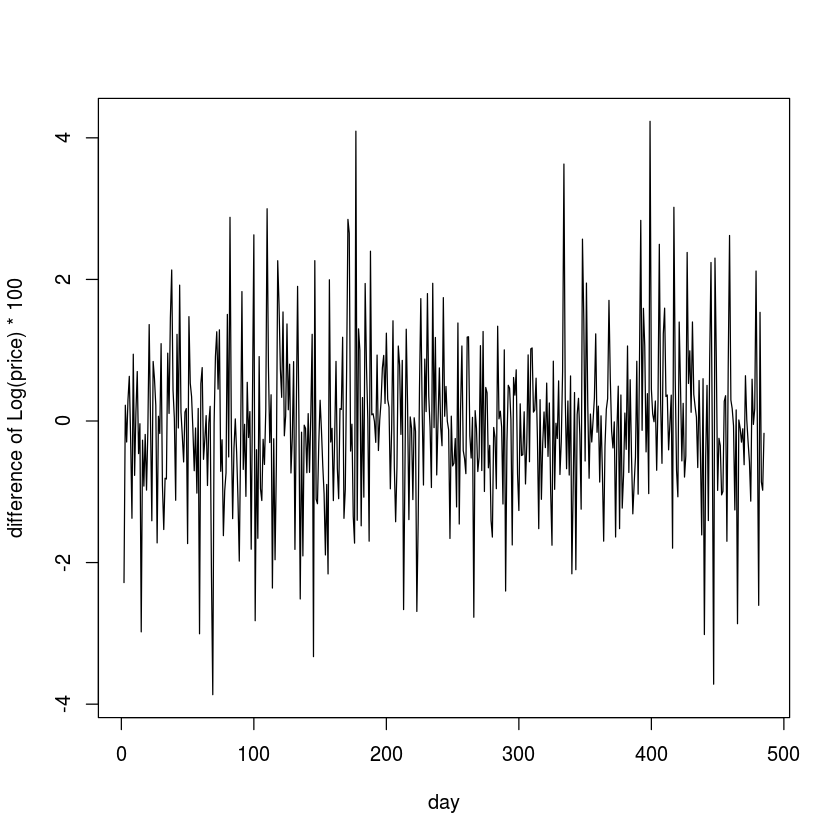

In [91]:
r.szts = diff(log(szts)) * 100

plot.ts(r.szts,ylab="difference of Log(price) * 100", xlab="day")



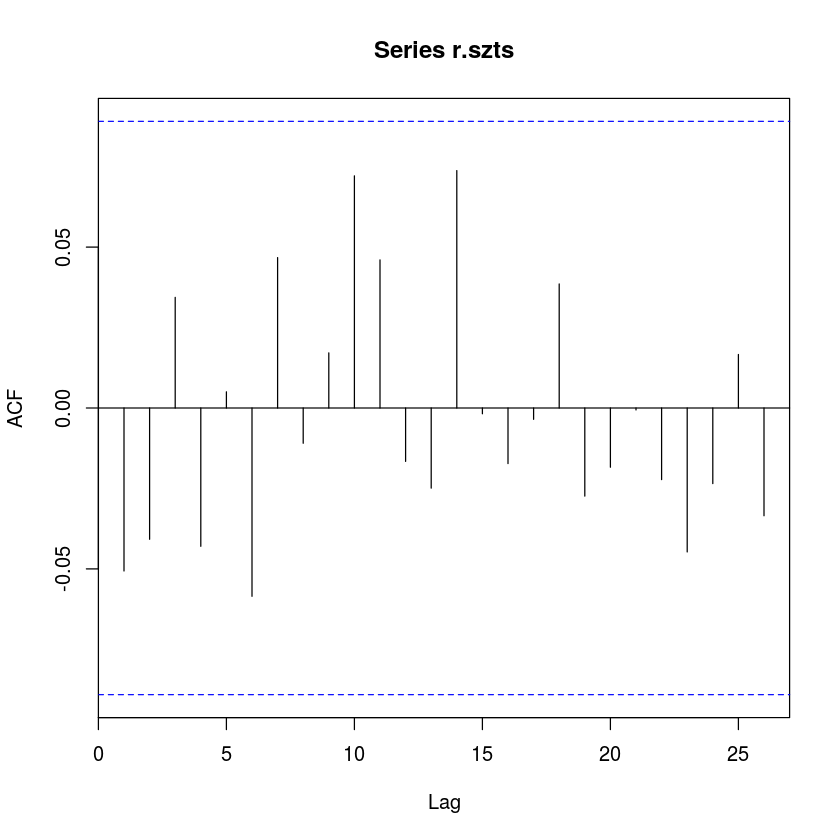

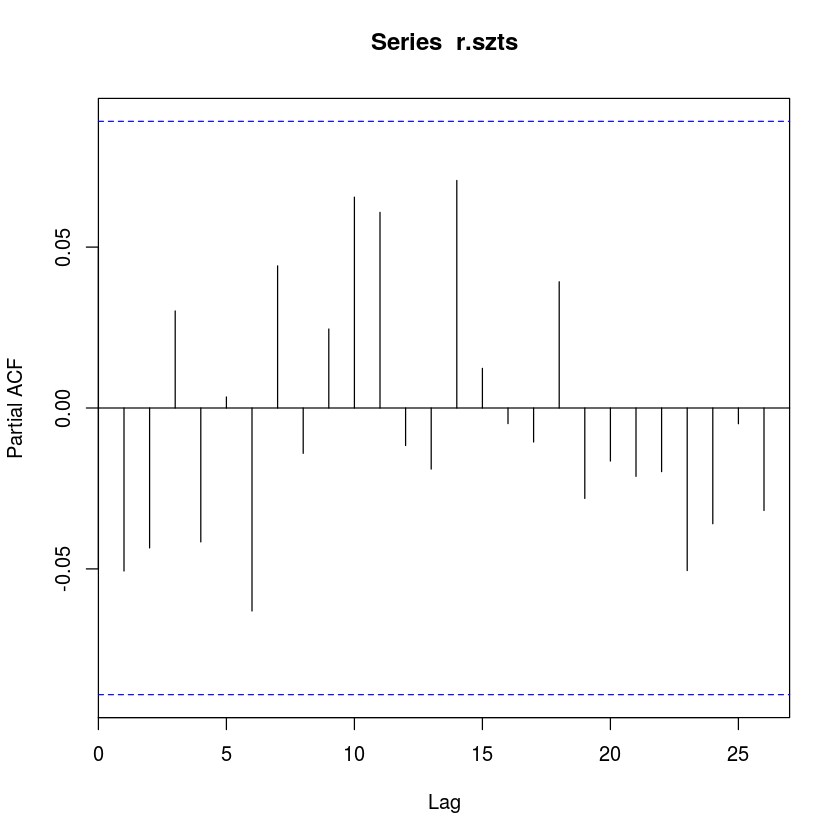

In [92]:
#adf.test(r.szts)
acf(r.szts, na.action= na.pass)
pacf(r.szts, na.action= na.pass)

In [93]:
library(TSA)



eacf(r.szts)

#r.szts

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x x o o o o o o o o o  o  o  o 
4 o x o x o o o o o o o  o  o  o 
5 o x x x x o o o o o o  o  o  o 
6 x x x x x x o o o o o  o  o  o 
7 x x o x x x o o o o o  o  o  o 


Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“9  linear dependencies found”

Reordering variables and trying again:


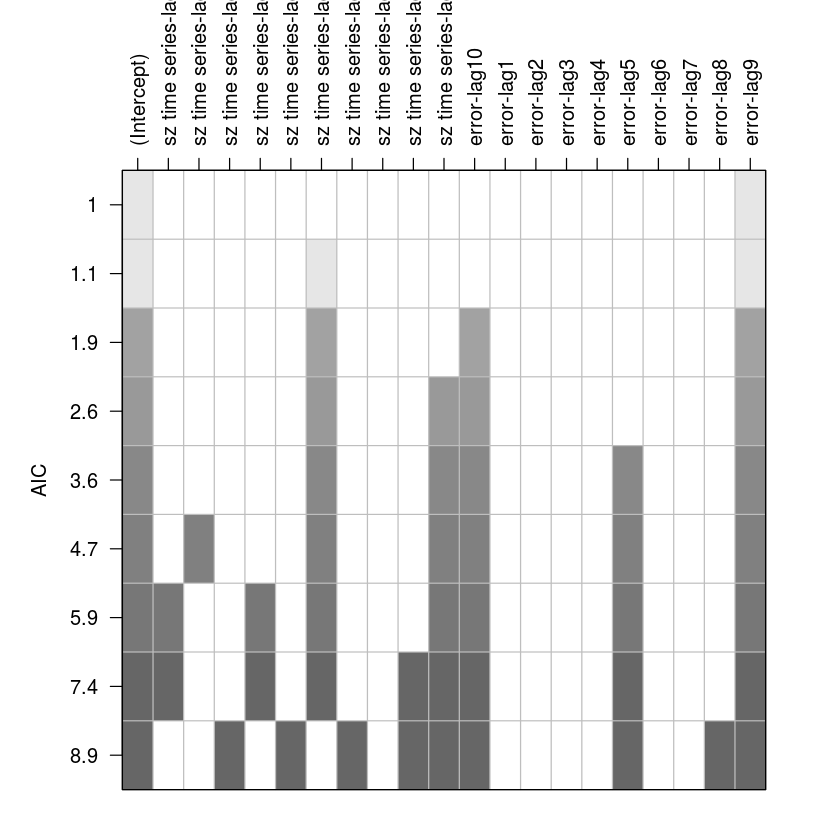

In [94]:
subsets = armasubsets(r.szts, nar=10, nma=10, y.name = "sz time series", ar.method='ols' )
plot(subsets,scale = "AIC")

Series: r.szts 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1     mean
      0.4655  -0.5203  -0.0612
s.e.  0.5221   0.5040   0.0467

sigma^2 estimated as 1.315:  log likelihood=-751.59
AIC=1511.18   AICc=1511.27   BIC=1527.91

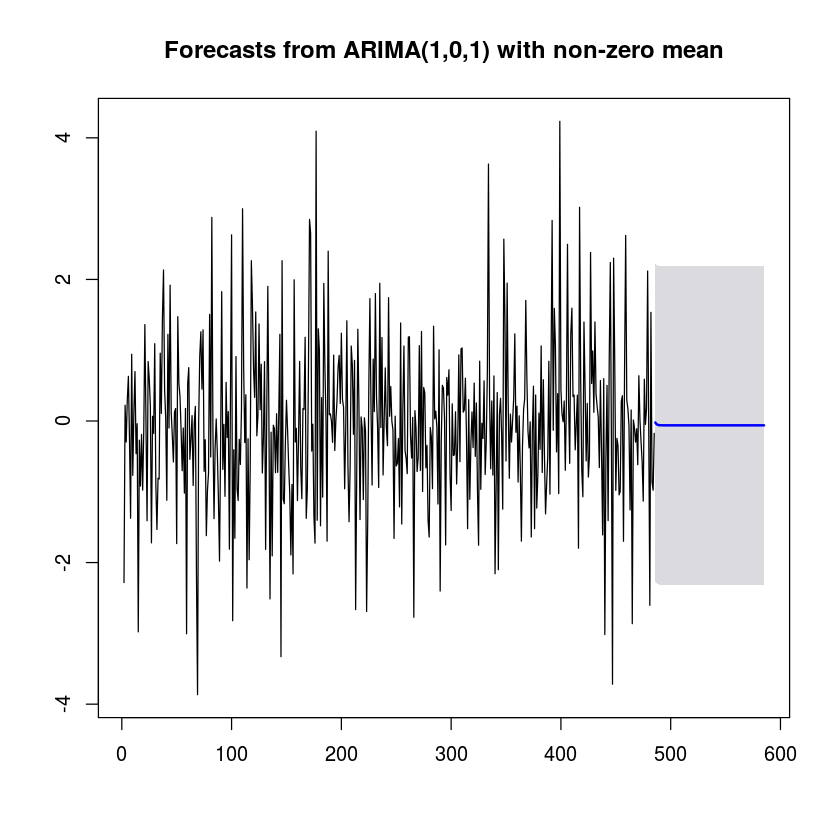

In [95]:
library(forecast)
fit1 = Arima(r.szts, order=c(1,0,1))
fit1

fit1_forecast = forecast(fit1, h=100,level=c(0.95))
plot(fit1_forecast)

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”

Series: r.szts 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
          ar1      ar2     ma1     ma2     mean
      -1.1768  -0.3903  1.1348  0.3118  -0.0607
s.e.      NaN      NaN     NaN     NaN   0.0494

sigma^2 estimated as 1.313:  log likelihood=-750.19
AIC=1512.37   AICc=1512.55   BIC=1537.47

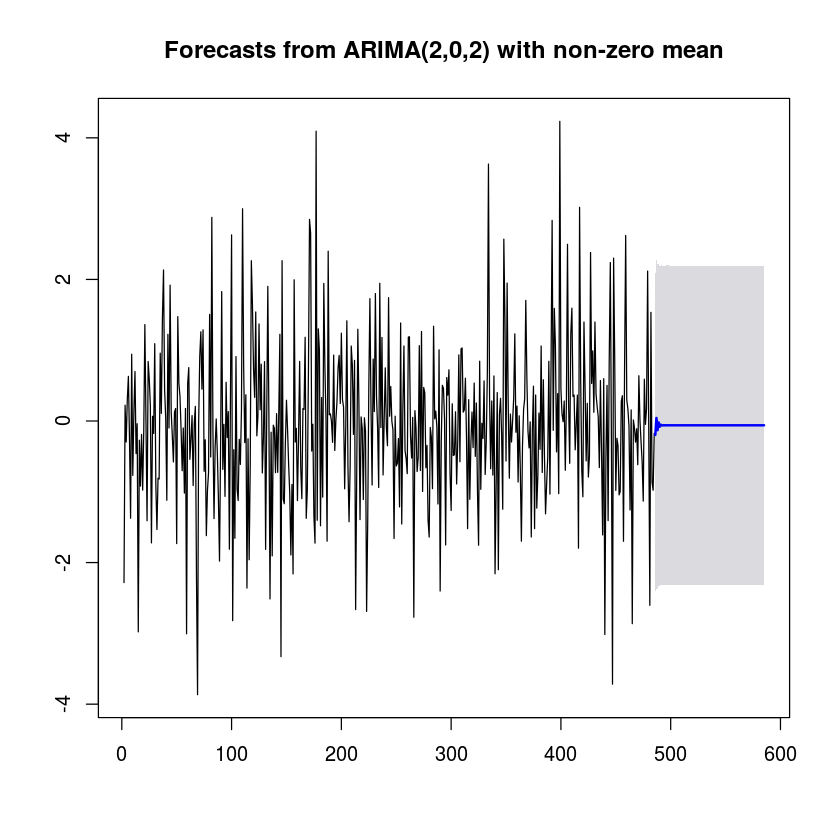

In [98]:
fit2 = Arima(r.szts, order=c(2,0,2))
fit2

fit2_forecast = forecast(fit2, h=100,level=c(0.95))
plot(fit2_forecast)

Series: r.szts 
ARIMA(1,0,9) with non-zero mean 

Coefficients:
         ar1      ma1      ma2     ma3      ma4     ma5      ma6     ma7
      0.7392  -0.7957  -0.0058  0.0676  -0.0695  0.0362  -0.0508  0.0770
s.e.  0.1703   0.1730   0.0597  0.0594   0.0588  0.0565   0.0610  0.0574
          ma8     ma9     mean
      -0.0296  0.0567  -0.0622
s.e.   0.0590  0.0513   0.0563

sigma^2 estimated as 1.316:  log likelihood=-747.81
AIC=1519.63   AICc=1520.29   BIC=1569.81

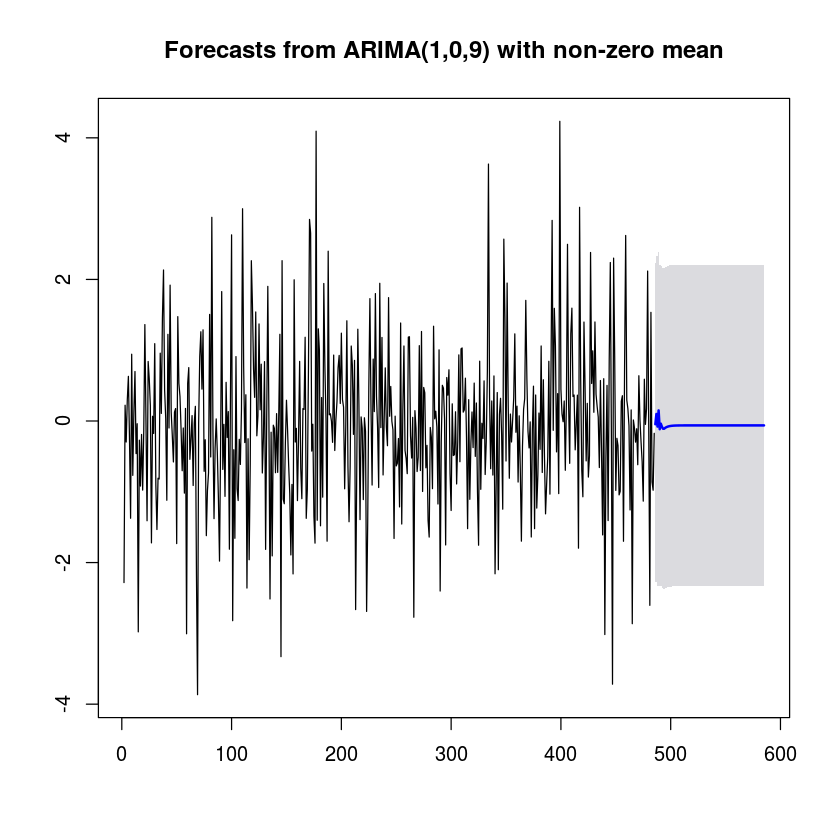

In [99]:
fit3 = Arima(r.szts, order=c(1,0,9))
fit3

fit3_forecast = forecast(fit3, h=100,level=c(0.95))
plot(fit3_forecast)

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”

Series: r.szts 
ARIMA(9,0,9) with non-zero mean 

Coefficients:
         ar1     ar2      ar3    ar4      ar5      ar6     ar7      ar8
      0.1568  0.1299  -0.3346  0.434  -0.2966  -0.0441  0.3999  -0.8085
s.e.     NaN     NaN   0.0275    NaN      NaN      NaN  0.0106      NaN
          ar9      ma1     ma2     ma3      ma4     ma5     ma6      ma7
      -0.2063  -0.1985  -0.172  0.4188  -0.4899  0.2932  0.0254  -0.4342
s.e.      NaN      NaN     NaN     NaN      NaN     NaN     NaN      NaN
         ma8     ma9     mean
      0.9012  0.2229  -0.0598
s.e.     NaN     NaN   0.0495

sigma^2 estimated as 1.24:  log likelihood=-735.78
AIC=1511.57   AICc=1513.38   BIC=1595.21

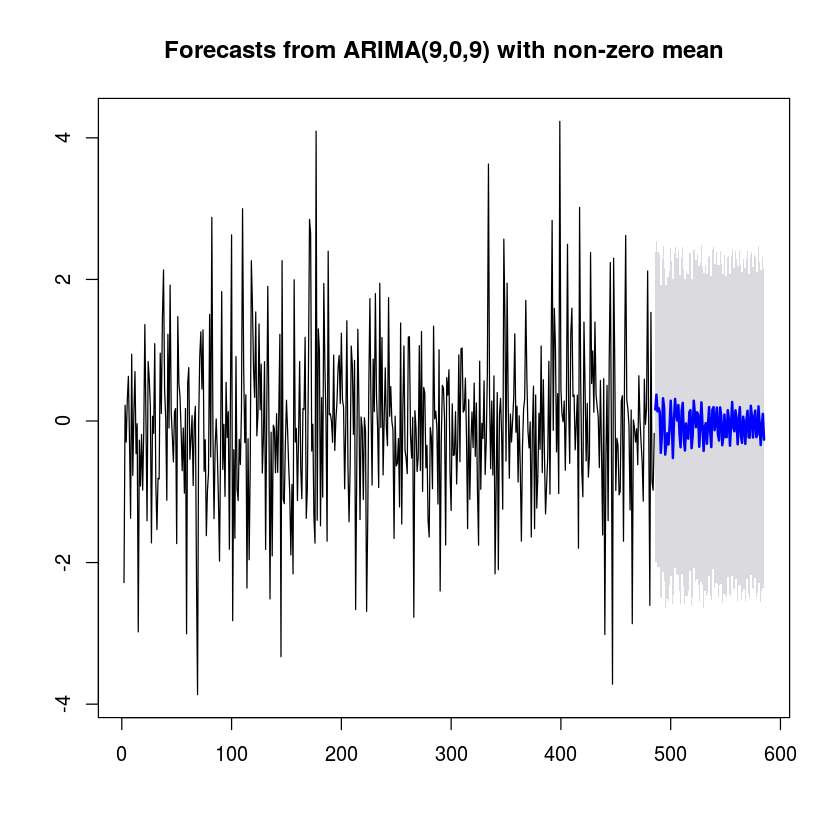

In [101]:
fit4 = Arima(r.szts, order=c(9,0,9))
fit4

fit4_forecast = forecast(fit4, h=100,level=c(0.95))
plot(fit4_forecast)


	Shapiro-Wilk normality test

data:  r.szts
W = 0.98194, p-value = 1.02e-05


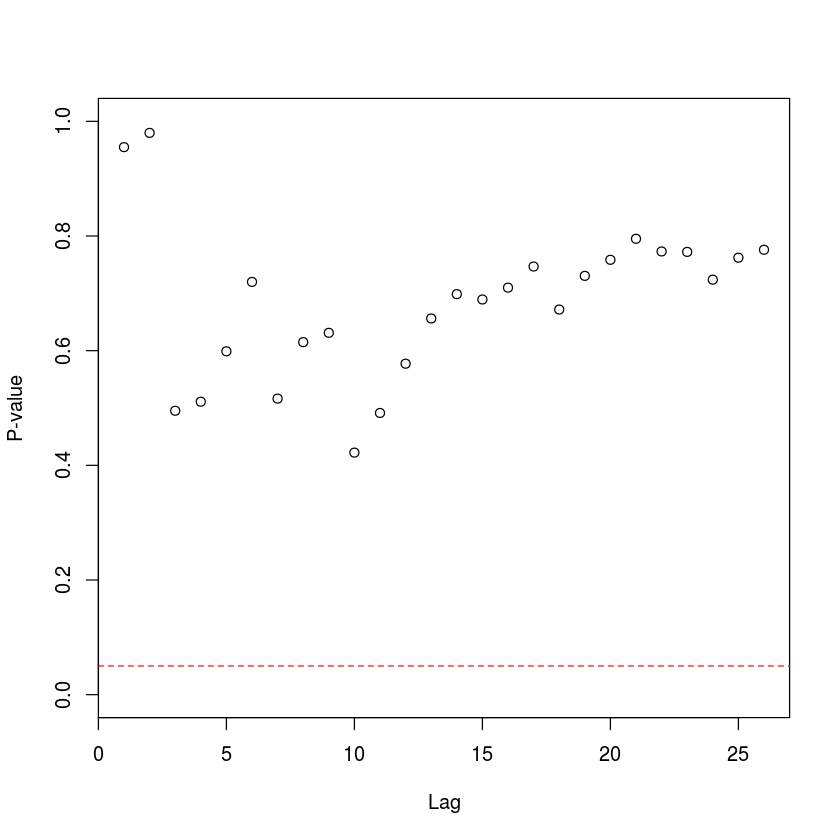

In [104]:
McLeod.Li.test(y = r.szts) # test if ARCH is reasonable

shapiro.test(r.szts) # test if the data's normality

In [107]:
#install.packages('fBasics')
library(fBasics)

skewness(r.szts) # testing for skewness
kurtosis(r.szts)

[1] 0.1646251
attr(,"method")
[1] "moment"

[1] 1.23097
attr(,"method")
[1] "excess"